# Probability and Statistics


In [0]:
import pandas as pd
import re


Using preprocessed data set, that doesn't contain retweets.

In [0]:
df = pd.read_csv('clean_nba_tweets.csv', parse_dates=['date'])
df.head(10)

,text,date,clean_text
0,You don’t say,2018-11-03 20:36:51,you do not say
1,Joel Embiid out here clowning on everyone. Bes...,2018-11-03 20:36:53,joel embiid out here clowning on everyone best...
2,I hope you talking about centers ?,2018-11-03 20:36:53,i hope you talking about center
3,He staying lmao,2018-11-03 20:36:59,he staying lmao
4,EMBIID OWNS PROPERTY IN ANDRE DRUMMONDS HEAD.,2018-11-03 20:38:05,embiid owns property in andre drummonds head
5,Joel Embiid vs Andre Drummond and 76ers vs Pis...,2018-11-03 20:38:05,joel embiid v andre drummond and 76ers v pisto...
6,@Savagepatchkd @215YwnBull @SportsCenter Look ...,2018-11-03 20:38:06,look at stats when embiid play ad absolutely d...
7,If this is what Embiid does to an elite reboun...,2018-11-03 20:38:06,if this is what embiid doe to an elite rebound...
8,2018 NBA Playoffs: Celtics vs. Cavaliers live ...,2018-11-03 20:38:07,2018 nba playoff celtic v cavalier live score ...
9,My #NBA picks for 11/3/18:,2018-11-03 20:38:07,my nba pick for 11318


In [0]:
df.shape

(34082, 3)

# Task 1 
Pick 3 pairs of words. 

Find** absolute probability** for each word in your corpus.  
Find** probability of Word given it’s pair**.  
Find** pair probability given it’s word**.  
Make a conclusion on pair dependencies.  
Compute **pearson correlation coefficient** on word and pair frequencies in corpus chunks. 

## Creating pairs of words
1. Independent: sun - 527, basketball - 401
2. Weak dependency: boston - 404,  team - 1021
3.  Strong dependency: lebron - 1035,  play - 909

Total amount of tweets: 34082


## Counting words from the pairs in tweets

In [0]:
def word_count(text, word):
  count = len(re.findall(word, text))
  return count

In [0]:
df['sun'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)sun(?:$|\W)'))
df['basketball'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)basketball(?:$|\W)'))
df['boston'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)boston(?:$|\W)'))
df['team'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)team(?:$|\W)'))
df['lebron'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)lebron(?:$|\W)'))
df['play'] = df['clean_text'].apply(lambda x: word_count(x, word=r'(?:^|\W)play(?:$|\W)'))

In [0]:
df.sample(10)

,text,date,clean_text,sun,basketball,boston,team,lebron,play
17773,Q choke dos Celtics,2018-11-04 01:44:21,q choke do celtic,0,0,0,0,0,0
2348,"wojespn: As TheSteinLine reports, center Tyson...",2018-11-03 21:50:30,wojespn a thesteinline report center tyson cha...,1,0,0,0,0,0
20293,Its why yuor having such a tuff go ..Your bein...,2018-11-04 02:23:21,it why yuor having such a tuff go your being c...,0,1,0,0,0,0
22642,@Lakers @SpectrumSN lebron calln for tha ball ...,2018-11-04 03:00:16,lebron calln for tha ball is tha funniest shit...,0,0,0,0,1,0
6959,@casey_brockman @zachbuettner @natevogt10 unreal,2018-11-03 22:30:44,brockman unreal,0,0,0,0,0,0
31647,COME ON LAKERS,2018-11-04 04:22:00,come on lakers,0,0,0,0,0,0
29947,Here we go @Lakers,2018-11-04 04:13:11,here we go,0,0,0,0,0,0
11792,LMFAOOOOOOO EMBIID THE BEST CENTER IN THE LEAG...,2018-11-04 00:02:13,lmfaooooooo embiid the best center in the leag...,0,0,0,0,0,0
29338,Lets go Lakers,2018-11-04 04:07:47,let u go lakers,0,0,0,0,0,0
33809,yeah lakers won but giving up huge leads is st...,2018-11-04 04:35:15,yeah lakers won but giving up huge lead is sti...,0,0,0,0,0,0


### Absolute probability of words sun and basketball

In [0]:
sun_prob = len(df[df.sun > 0])/len(df)
sun_prob

0.01513995657531835

In [0]:
basketball_prob = len(df[df.basketball > 0])/len(df)
basketball_prob

0.011296285429258847

### Conditional probability


P(basketball | sun)

In [0]:
basketball_sun_prob = len(df[df.sun > 0][df.basketball > 0]) / len(df[df.sun > 0])
basketball_sun_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.040697674418604654

P(sun | basketball)

In [0]:
sun_basketball_prob = len(df[df.basketball > 0][df.sun > 0]) / len(df[df.basketball > 0])
sun_basketball_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.05454545454545454

### Correlation between sun and basketball

In [0]:
from scipy.stats.stats import pearsonr

Correlation in all tweets

In [0]:
corr, p = pearsonr(df['sun'], df['basketball'])
print(corr)

0.07814623190800296


Correlation per 2000 chunks

In [0]:
df.groupby(lambda x: x//2000)['sun'].corr(df['basketball'])

0     0.140736
1    -0.014576
2     0.047349
3     0.058758
4     0.106791
5     0.233061
6     0.205636
7     0.053601
8    -0.011375
9    -0.010626
10    0.086511
11    0.117846
12   -0.009394
13   -0.005152
14   -0.004306
15   -0.005177
16   -0.003621
17   -0.012346
Name: sun, dtype: float64

###  Absolute probability of words boston and team

In [0]:
boston_prob = len(df[df.boston > 0])/len(df)
boston_prob


0.011120239422569098

In [0]:
team_prob = len(df[df.team > 0])/len(df)
team_prob


0.027345813039140895

### Conditional probability

P(team | boston)

In [0]:
team_boston_prob = len(df[df.boston > 0][df.team > 0]) / len(df[df.boston > 0])
team_boston_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.04221635883905013

P(boston | team)

In [0]:
boston_team_prob = len(df[df.team > 0][df.boston > 0]) / len(df[df.team > 0])
boston_team_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.017167381974248927

### Correlation between boston and team

In [0]:
corr, p = pearsonr(df['boston'], df['team'])
print(corr)

0.12310342173219795


In [0]:
df.groupby(lambda x: x//2000)['boston'].corr(df['team'])

0     0.567247
1    -0.006792
2     0.059192
3    -0.014094
4     0.040134
5     0.217820
6     0.184867
7     0.034767
8    -0.016834
9    -0.015048
10    0.135592
11    0.429158
12   -0.014749
13   -0.009683
14   -0.008304
15   -0.005987
16   -0.005169
17         NaN
Name: boston, dtype: float64

### Absolute probability of words lebron and play

In [0]:
lebron_prob = len(df[df.lebron > 0])/len(df)
lebron_prob

0.028460771081509302

In [0]:
play_prob = len(df[df.play > 0])/len(df)
play_prob

0.02441171292764509

### Conditional probability

P(play | lebron)

In [0]:
play_lebron_prob = len(df[df.lebron > 0][df.play > 0]) / len(df[df.lebron > 0])
play_lebron_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.06597938144329897

P(lebron | play)

In [0]:
lebron_play_prob = len(df[df.play > 0][df.lebron > 0]) / len(df[df.play > 0])
lebron_play_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.07692307692307693

### Correlation between lebron and play

In [0]:
corr, p = pearsonr(df['lebron'], df['play'])
print(corr)

0.305552228358264


In [0]:
df.groupby(lambda x: x//2000)['lebron'].corr(df['play'])

0     0.656211
1     0.075405
2     0.045184
3     0.003985
4     0.071832
5     0.170992
6     0.300322
7    -0.018324
8    -0.025714
9    -0.003522
10    0.363157
11    0.586937
12    0.111075
13    0.031121
14    0.024243
15    0.583103
16    0.078201
17         NaN
Name: lebron, dtype: float64

## Conclusion
Based on correlation we can see that words **lebron** and **play** are the most dependent. Medium dependency occur between **boston** and **team** and very low correlation between **sun** and ** basketball.**


# Task 2
Draw messages frequency over the whole period

Draw a diagram of distribution of word **lebron** frequency over the whole day. Don’t forget about normalization.


In [0]:
hour_tweets = df[['lebron', 'date']].groupby([pd.Grouper(key='date', freq='H')])['lebron'].agg(['sum', 'count']).reset_index()
hour_tweets

,date,sum,count
0,2018-11-03 20:00:00,19,334
1,2018-11-03 21:00:00,121,3595
2,2018-11-03 22:00:00,99,4878
3,2018-11-03 23:00:00,55,2875
4,2018-11-04 00:00:00,62,2447
5,2018-11-04 01:00:00,73,4540
6,2018-11-04 02:00:00,122,3946
7,2018-11-04 03:00:00,275,5456
8,2018-11-04 04:00:00,208,6011


## Messages frequency over 8 hours

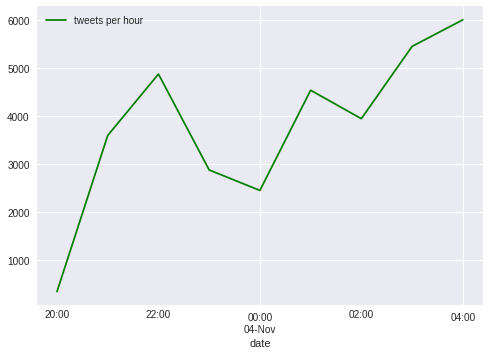

In [0]:
hour_tweets.plot(x='date', y='count', color='g', label='tweets per hour');

## Normalization
Dividing number of word 'lebron' per hour by number of tweets per hour.

In [0]:
hour_tweets['lebron_norm'] = hour_tweets['sum'] / hour_tweets['count'] 
hour_tweets

,date,sum,count,lebron_norm
0,2018-11-03 20:00:00,19,334,0.056886
1,2018-11-03 21:00:00,121,3595,0.033658
2,2018-11-03 22:00:00,99,4878,0.020295
3,2018-11-03 23:00:00,55,2875,0.019130
4,2018-11-04 00:00:00,62,2447,0.025337
5,2018-11-04 01:00:00,73,4540,0.016079
6,2018-11-04 02:00:00,122,3946,0.030917
7,2018-11-04 03:00:00,275,5456,0.050403
8,2018-11-04 04:00:00,208,6011,0.034603


In [0]:
from sklearn import preprocessing
hour_tweets['lebron_norm'] = preprocessing.scale(hour_tweets['lebron_norm'].astype('float64'))
hour_tweets

,date,sum,count,lebron_norm
0,2018-11-03 20:00:00,19,334,1.890539
1,2018-11-03 21:00:00,121,3595,0.131362
2,2018-11-03 22:00:00,99,4878,-0.880644
3,2018-11-03 23:00:00,55,2875,-0.968857
4,2018-11-04 00:00:00,62,2447,-0.498798
5,2018-11-04 01:00:00,73,4540,-1.199932
6,2018-11-04 02:00:00,122,3946,-0.076185
7,2018-11-04 03:00:00,275,5456,1.399556
8,2018-11-04 04:00:00,208,6011,0.202959


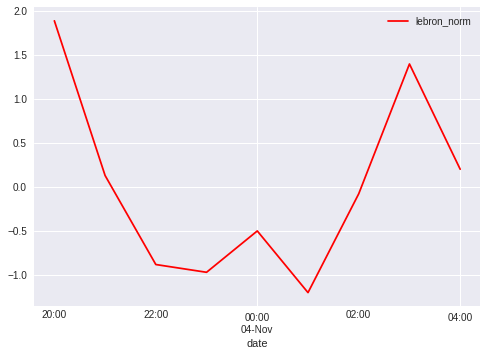

In [0]:
hour_tweets.plot(x='date', y='lebron_norm', color='r');